In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, cross_validate, cross_val_predict, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score, plot_roc_curve, mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn import preprocessing
import plotly.express as px
import seaborn as sn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [7]:
dataset=pd.read_csv('../data/rock_music.csv')
dataset.set_index('name', inplace=True)
dataset

,artist,release_date,duration,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,hit
name,,,,,,,,,,,,,,,,
Smells Like Teen Spirit,Nirvana,1991,5.03,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720,1
Stairway to Heaven - Remaster,Led Zeppelin,1971,8.05,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197,1
Bohemian Rhapsody - Remastered 2011,Queen,1975,5.91,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228,1
Imagine - Remastered 2010,John Lennon,1971,3.13,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169,1
(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.71,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.56,47,0.296,0.005910,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406,0
Cellophane,King Gizzard & The Lizard Wizard,2014,3.18,44,0.432,0.002130,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357,0
Hot Water,King Gizzard & The Lizard Wizard,2014,3.40,40,0.627,0.860000,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734,0


&nbsp;

Поделба на податоците

In [8]:
features = dataset.columns.drop(['hit'])
labels = ['hit']

X = dataset[features]
Y = dataset[labels]

In [9]:
encoder =  LabelEncoder()
X['artist'] = encoder.fit_transform(X['artist'])
X.head()

,artist,release_date,duration,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
name,,,,,,,,,,,,,,,
Smells Like Teen Spirit,942,1991,5.03,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
Stairway to Heaven - Remaster,772,1971,8.05,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
Bohemian Rhapsody - Remastered 2011,1045,1975,5.91,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
Imagine - Remastered 2010,704,1971,3.13,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
(I Can't Get No) Satisfaction - Mono Version,1516,1965,3.71,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931


In [10]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2)

In [11]:
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)
X = pd.DataFrame(scaler.transform(X))

In [12]:
dataset.hit.value_counts()

0    2755
1    2613
Name: hit, dtype: int64

&nbsp;

## Decision Tree Classifier

In [87]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=7)
dt.fit(trainX, trainY)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [88]:
predicted = dt.predict(testX)

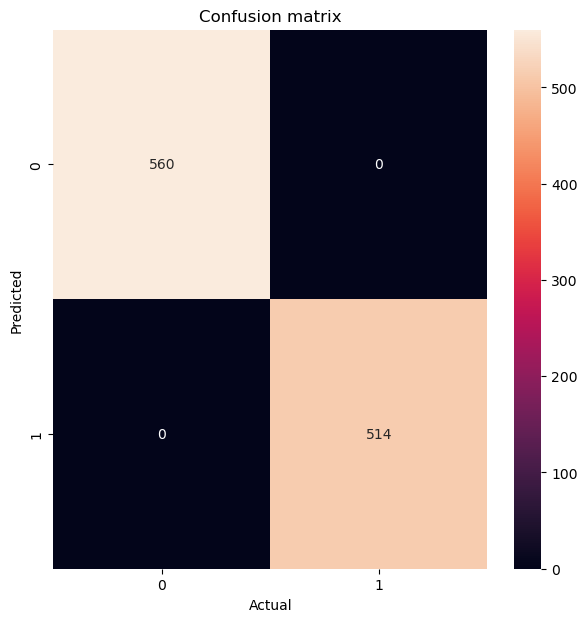

In [89]:
plt.figure(figsize=(7,7))
sn.heatmap(confusion_matrix(testY, predicted), annot=True, fmt='.5g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [90]:
dt_accuracy = accuracy_score(testY, predicted)
recall = recall_score(testY, predicted)
precision = precision_score(testY, predicted)
f1 = f1_score(testY, predicted)

print(f'Accuracy: {dt_accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 score: {f1}')

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 score: 1.0


<Figure size 1000x1000 with 0 Axes>

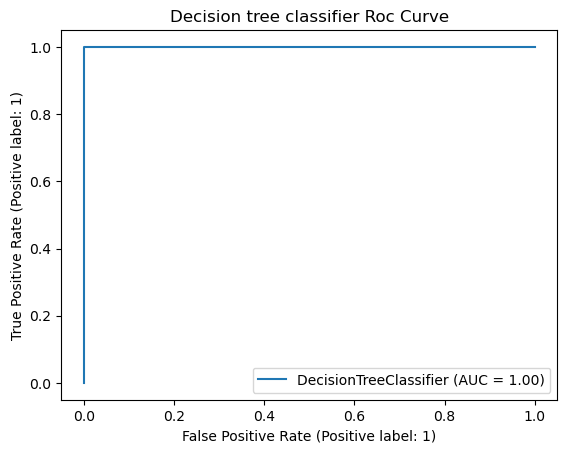

In [91]:
plt.figure(figsize=(10,10))
plot_roc_curve(dt, testX, testY)
plt.title('Decision tree classifier Roc Curve')
plt.show()

&nbsp;

## Naive Bayes

In [92]:
model = GaussianNB()
model.fit(trainX, trainY)

GaussianNB()

In [93]:
predicted = model.predict(testX)

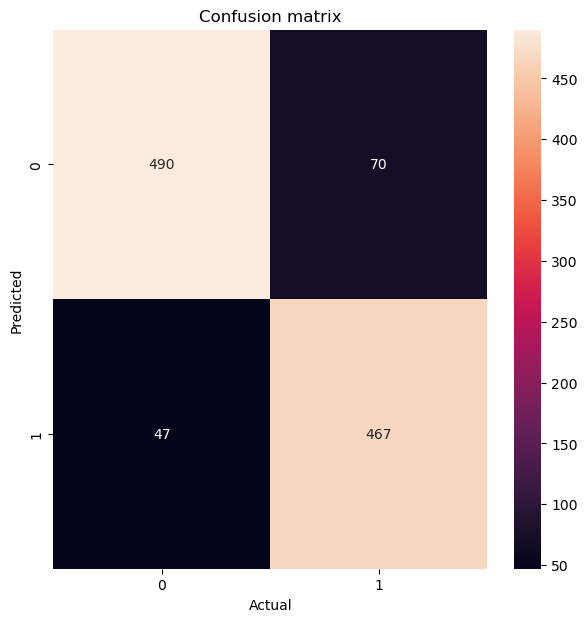

In [94]:
plt.figure(figsize=(7,7))
sn.heatmap(confusion_matrix(testY, predicted), annot=True, fmt='.5g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [95]:
nb_accuracy = accuracy_score(testY, predicted)
recall = recall_score(testY, predicted)
precision = precision_score(testY, predicted)
f1 = f1_score(testY, predicted)

print(f'Accuracy: {nb_accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 score: {f1}')

Accuracy: 0.8910614525139665
Recall: 0.9085603112840467
Precision: 0.8696461824953445
F1 score: 0.8886774500475738


<Figure size 1000x1000 with 0 Axes>

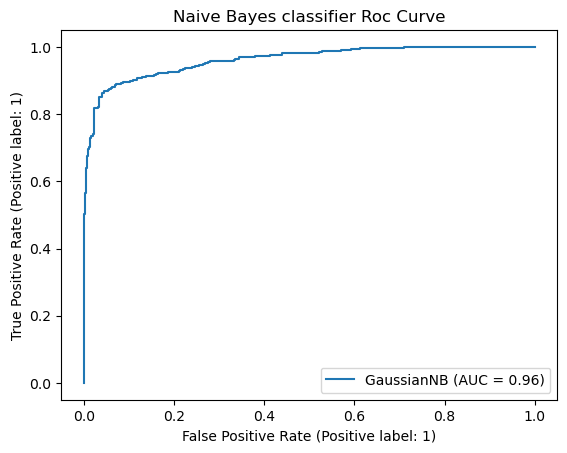

In [96]:
plt.figure(figsize=(10,10))
plot_roc_curve(model, testX, testY)
plt.title('Naive Bayes classifier Roc Curve')
plt.show()

&nbsp;

## KNN

In [97]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trainX, trainY)

KNeighborsClassifier()

In [98]:
predicted = knn.predict(testX)

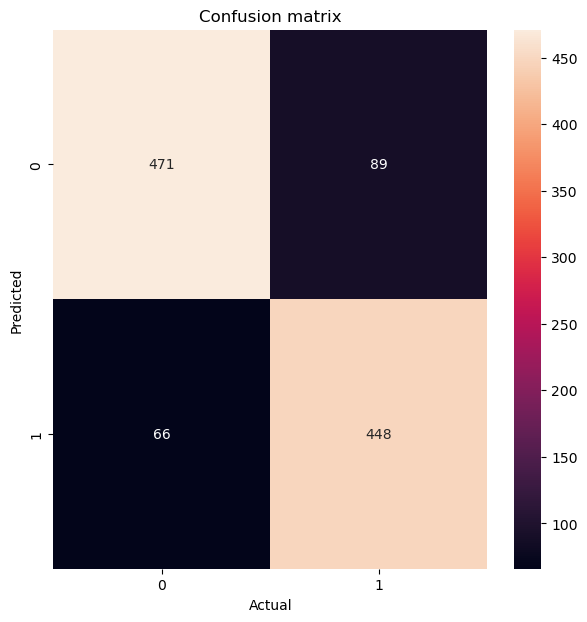

In [99]:
plt.figure(figsize=(7,7))
sn.heatmap(confusion_matrix(testY, predicted), annot=True, fmt='.5g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [100]:
knn_accuracy = accuracy_score(testY, predicted)
recall = recall_score(testY, predicted)
precision = precision_score(testY, predicted)
f1 = f1_score(testY, predicted)

print(f'Accuracy: {knn_accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 score: {f1}')

Accuracy: 0.8556797020484171
Recall: 0.8715953307392996
Precision: 0.8342644320297952
F1 score: 0.8525214081826831


<Figure size 1000x1000 with 0 Axes>

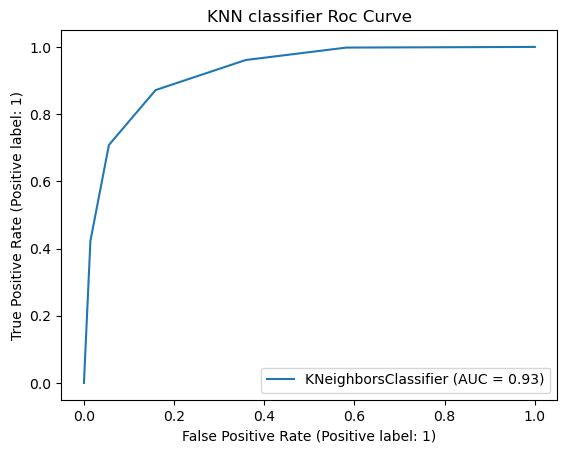

In [101]:
plt.figure(figsize=(10,10))
plot_roc_curve(knn, testX, testY)
plt.title('KNN classifier Roc Curve')
plt.show()

In [102]:
error1 = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric="cosine")
    knn.fit(trainX, trainY)
    pred_i = knn.predict(testX)
    error1.append(np.mean(pred_i != testY.values))
    

error2 = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
    knn.fit(trainX, trainY)
    pred_i = knn.predict(testX)
    error2.append(np.mean(pred_i != testY.values))
    
error3 = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric="manhattan")
    knn.fit(trainX, trainY)
    pred_i = knn.predict(testX)
    error3.append(np.mean(pred_i != testY.values))
    
error4 = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric="minkowski")
    knn.fit(trainX, trainY)
    pred_i = knn.predict(testX)
    error4.append(np.mean(pred_i != testY.values))

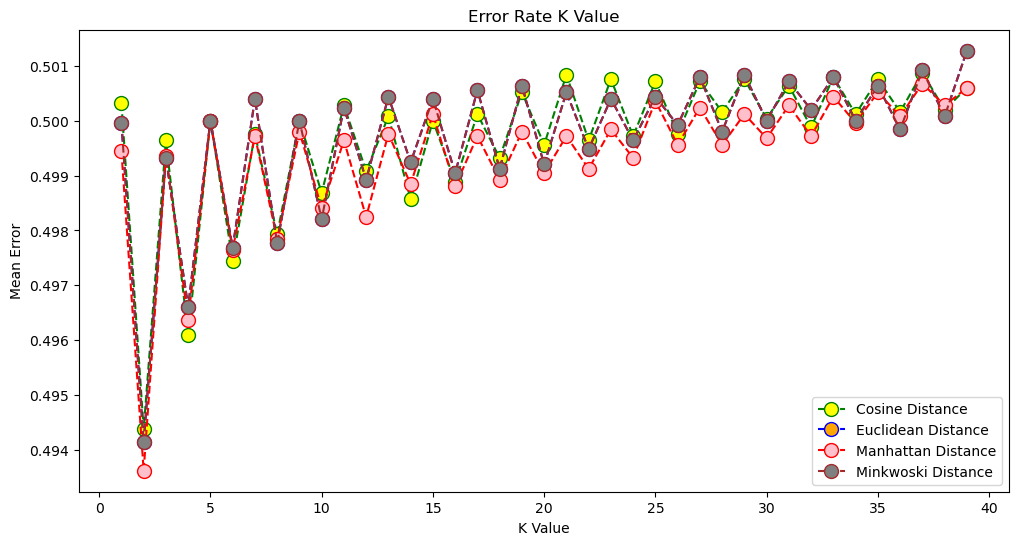

In [103]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error1, color='green', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10, label='Cosine Distance')
plt.plot(range(1, 40), error2, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=10, label='Euclidean Distance')
plt.plot(range(1, 40), error3, color='red', linestyle='dashed', marker='o',
         markerfacecolor='pink', markersize=10, label='Manhattan Distance')
plt.plot(range(1, 40), error4, color='brown', linestyle='dashed', marker='o',
         markerfacecolor='gray', markersize=10, label='Minkwoski Distance')

plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.legend()
plt.show()

&nbsp;

## Logistic regression

In [104]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(trainX, trainY)

LogisticRegression(max_iter=10000)

In [105]:
predicted = log_reg.predict(testX)

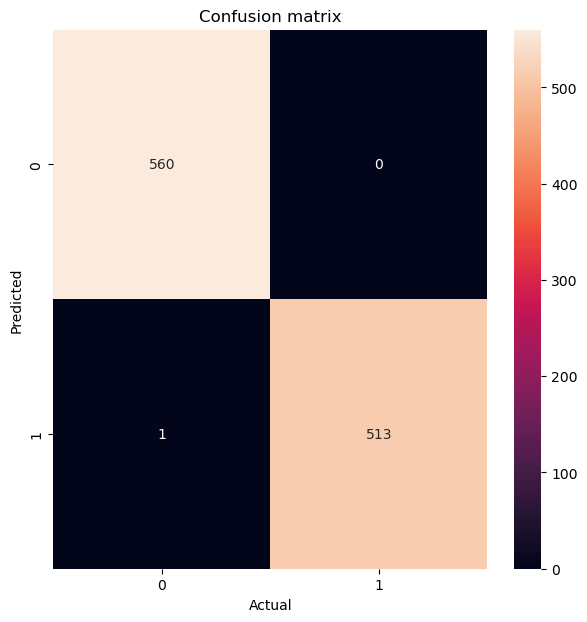

In [106]:
plt.figure(figsize=(7,7))
sn.heatmap(confusion_matrix(testY, predicted), annot=True, fmt='.5g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [107]:
log_accuracy = accuracy_score(testY, predicted)
recall = recall_score(testY, predicted)
precision = precision_score(testY, predicted)
f1 = f1_score(testY, predicted)

print(f'Accuracy: {log_accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 score: {f1}')

Accuracy: 0.9990689013035382
Recall: 0.9980544747081712
Precision: 1.0
F1 score: 0.9990262901655307


<Figure size 1000x1000 with 0 Axes>

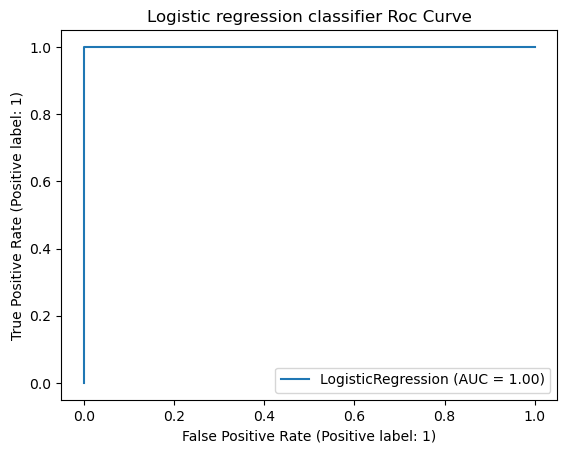

In [108]:
plt.figure(figsize=(10,10))
plot_roc_curve(log_reg, testX, testY)
plt.title('Logistic regression classifier Roc Curve')
plt.show()

&nbsp;

## Support Vector Machine (SVM)

Radial Basis Function (RBF) Kernel

In [109]:
rbf = SVC(kernel = 'rbf')
rbf.fit(trainX, trainY)

SVC()

In [110]:
predicted = rbf.predict(testX)

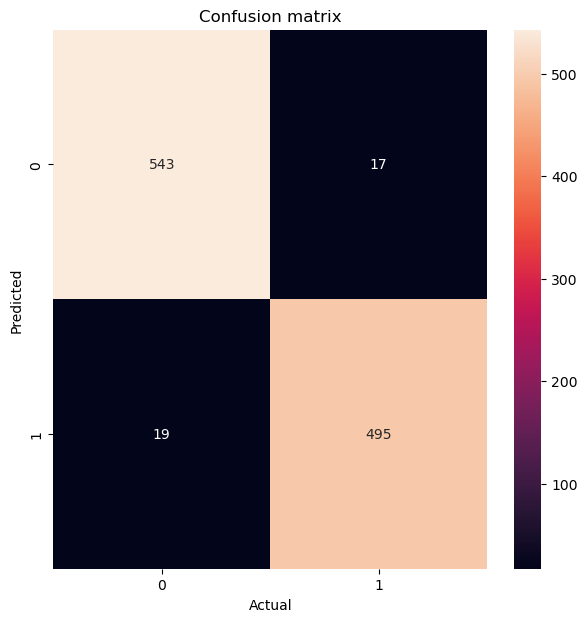

In [111]:
plt.figure(figsize=(7,7))
sn.heatmap(confusion_matrix(testY, predicted), annot=True, fmt='.5g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [112]:
rbf_accuracy = accuracy_score(testY, predicted)
recall = recall_score(testY, predicted)
precision = precision_score(testY, predicted)
f1 = f1_score(testY, predicted)

print(f'Accuracy: {rbf_accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 score: {f1}')

Accuracy: 0.9664804469273743
Recall: 0.9630350194552529
Precision: 0.966796875
F1 score: 0.9649122807017544


<Figure size 1000x1000 with 0 Axes>

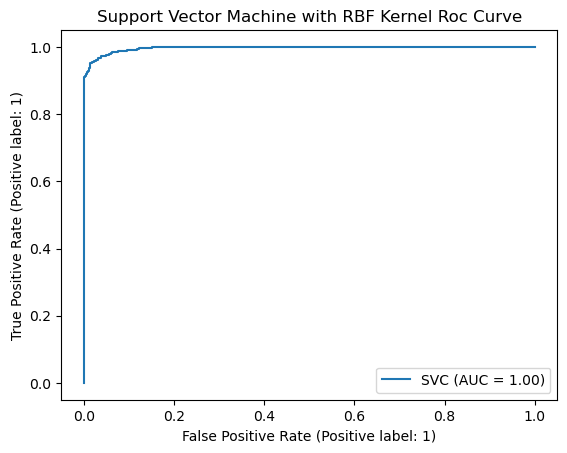

In [113]:
plt.figure(figsize=(10,10))
plot_roc_curve(rbf, testX, testY)
plt.title('Support Vector Machine with RBF Kernel Roc Curve')
plt.show()

&nbsp;

Linear Kernel

In [114]:
linear = SVC(kernel = 'linear')
linear.fit(trainX, trainY)

SVC(kernel='linear')

In [115]:
predicted = linear.predict(testX)

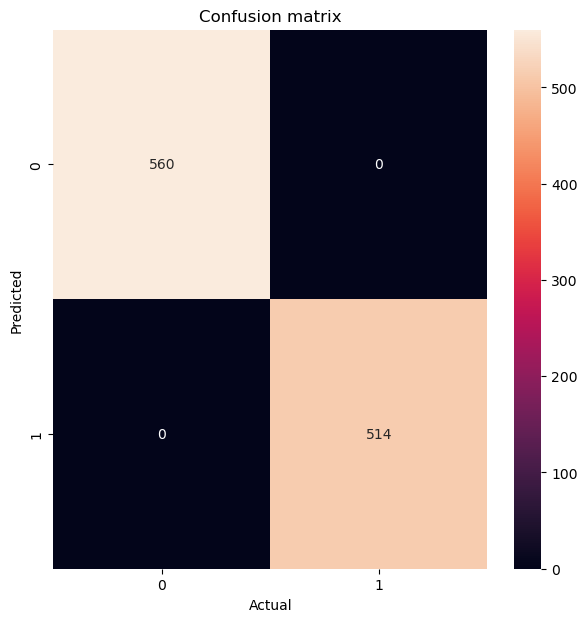

In [116]:
plt.figure(figsize=(7,7))
sn.heatmap(confusion_matrix(testY, predicted), annot=True, fmt='.5g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [117]:
linear_accuracy = accuracy_score(testY, predicted)
recall = recall_score(testY, predicted)
precision = precision_score(testY, predicted)
f1 = f1_score(testY, predicted)

print(f'Accuracy: {linear_accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 score: {f1}')

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 score: 1.0


<Figure size 1000x1000 with 0 Axes>

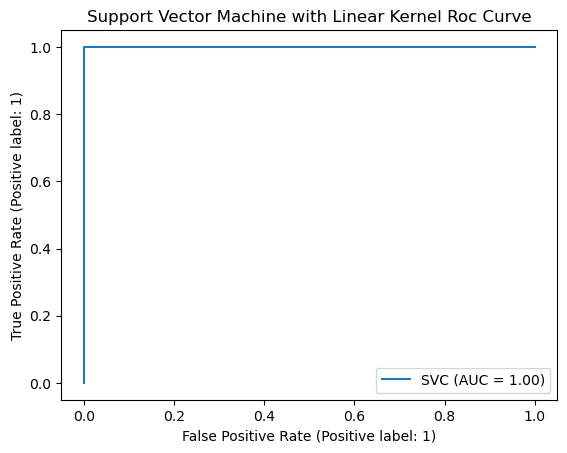

In [118]:
plt.figure(figsize=(10,10))
plot_roc_curve(linear, testX, testY)
plt.title('Support Vector Machine with Linear Kernel Roc Curve')
plt.show()

&nbsp;

## Linear Discriminant Analysis (LDA)

In [119]:
lda = LDA()
lda.fit(trainX, trainY)

LinearDiscriminantAnalysis()

In [120]:
predicted = lda.predict(testX)

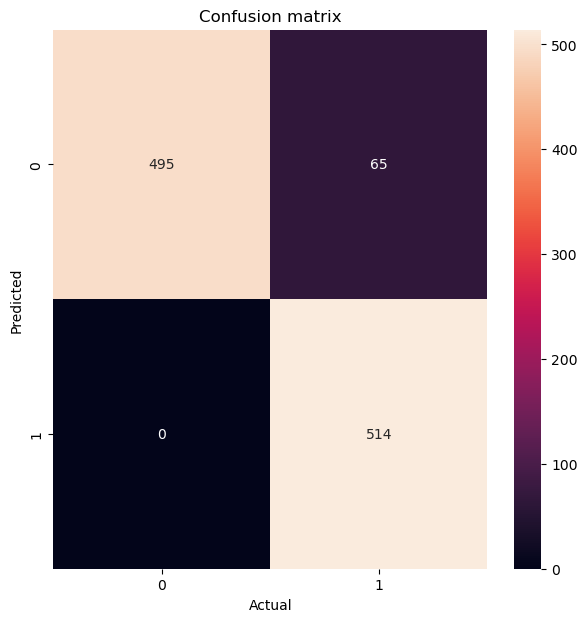

In [121]:
plt.figure(figsize=(7,7))
sn.heatmap(confusion_matrix(testY, predicted), annot=True, fmt='.5g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [122]:
lda_accuracy = accuracy_score(testY, predicted)
recall = recall_score(testY, predicted)
precision = precision_score(testY, predicted)
f1 = f1_score(testY, predicted)

print(f'Accuracy: {lda_accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 score: {f1}')

Accuracy: 0.9394785847299814
Recall: 1.0
Precision: 0.8877374784110535
F1 score: 0.9405306495882891


<Figure size 1000x1000 with 0 Axes>

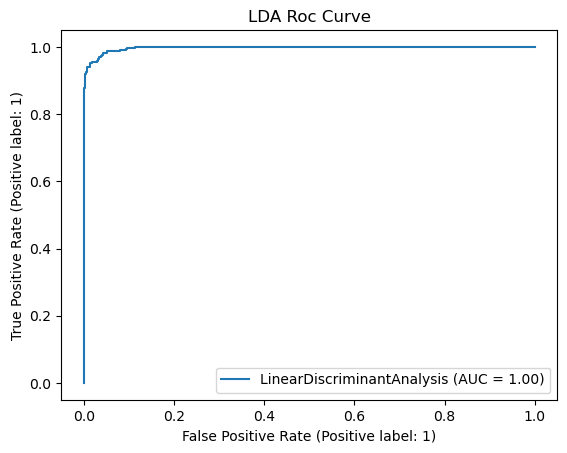

In [123]:
plt.figure(figsize=(10,10))
plot_roc_curve(lda, testX, testY)
plt.title('LDA Roc Curve')
plt.show()

&nbsp;

## Ensemble models

#### Voting classifier

In [124]:
voting_clf = VotingClassifier(estimators=[('KNN', knn), ('DTree', dt), ('LogReg', log_reg)], voting='hard')
voting_clf.fit(trainX, trainY)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=39)),
                             ('DTree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=7)),
                             ('LogReg', LogisticRegression(max_iter=10000))])

In [125]:
predicted = voting_clf.predict(testX)

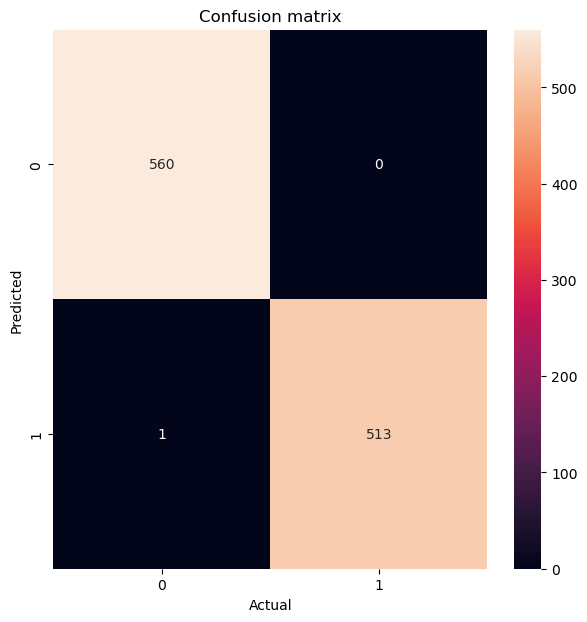

In [126]:
plt.figure(figsize=(7,7))
sn.heatmap(confusion_matrix(testY, predicted), annot=True, fmt='.5g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [127]:
vot_accuracy = accuracy_score(testY, predicted)
recall = recall_score(testY, predicted)
precision = precision_score(testY, predicted)
f1 = f1_score(testY, predicted)

print(f'Accuracy: {vot_accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 score: {f1}')

Accuracy: 0.9990689013035382
Recall: 0.9980544747081712
Precision: 1.0
F1 score: 0.9990262901655307


#### Bagging

In [128]:
logreg_bagging_model = BaggingClassifier(base_estimator=log_reg, n_estimators=5)
dt_bagging_model = BaggingClassifier(base_estimator=dt, n_estimators=5)
random_forest = RandomForestClassifier(n_estimators=10)
extra_trees = ExtraTreesClassifier(n_estimators=10)

def bagging_ensemble(model):
    k_folds = KFold(n_splits=20)
    results = cross_val_score(model, trainX, trainY, cv=k_folds)
    print(results.mean())

bagging_ensemble(logreg_bagging_model)
bagging_ensemble(dt_bagging_model)
bagging_ensemble(random_forest)
bagging_ensemble(extra_trees)

0.9976711584438165
1.0
0.999533797000652
0.9576124755487939


#### Adaptive Boosting (Ada Boost)

In [129]:
kfold = KFold(n_splits=10)
boost = AdaBoostClassifier(n_estimators=10)
results = cross_val_score(boost, testX, testY, cv=kfold)
print(results.mean())

1.0


&nbsp;

In [130]:
print('Training Model Accuracy Outputs:')
print('-')
print('Decision Tree Classifier:', round(dt_accuracy * 100,2),'%')
print('Naive Bayes:', round(nb_accuracy * 100,2),'%')
print('KNN:', round(knn_accuracy * 100,2),'%')
print('Logistic Regression:', round(log_accuracy * 100,2),'%')
print('SVM with rbf kernel:', round(rbf_accuracy * 100,2),'%')
print('SVM with linear kernel kernel:', round(linear_accuracy * 100,2),'%')
print('LDA:', round(lda_accuracy * 100,2),'%')
print('Ensemble models')
print('Voting classifier:', round(vot_accuracy * 100,2),'%')

Training Model Accuracy Outputs:
-
Decision Tree Classifier: 100.0 %
Naive Bayes: 89.11 %
KNN: 85.57 %
Logistic Regression: 99.91 %
SVM with rbf kernel: 96.65 %
SVM with linear kernel kernel: 100.0 %
LDA: 93.95 %
Ensemble models
Voting classifier: 99.91 %


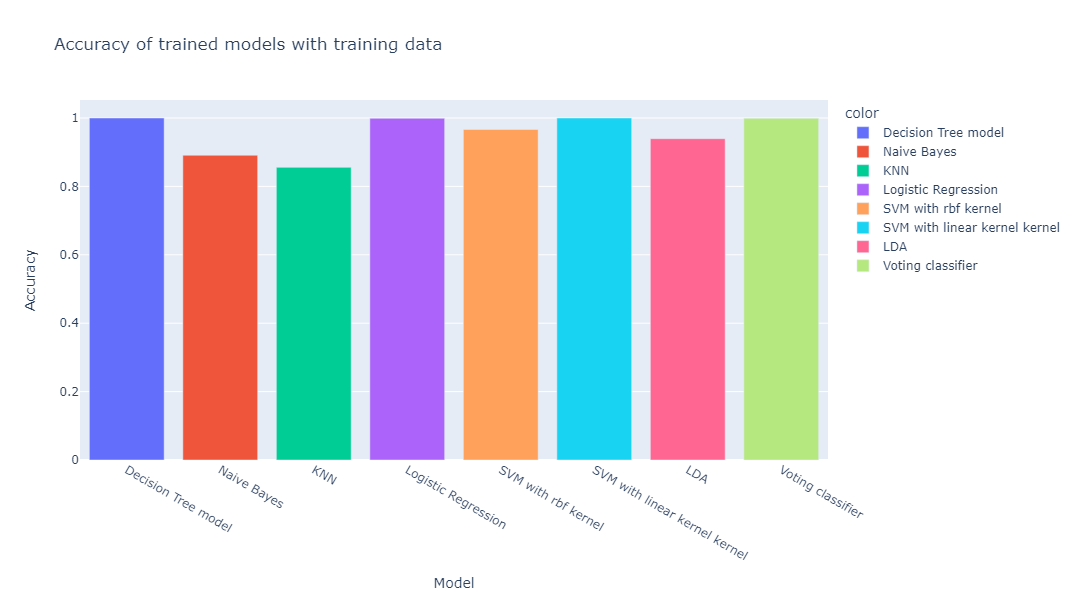

In [142]:
fig=(7,7)
fig = px.bar(x=['Decision Tree model', 'Naive Bayes', 'KNN', 'Logistic Regression', 'SVM with rbf kernel', 'SVM with linear kernel kernel',
               'LDA', 'Voting classifier'], 
             y=[dt_accuracy, nb_accuracy, knn_accuracy, log_accuracy, rbf_accuracy, linear_accuracy, lda_accuracy, vot_accuracy], 
            color=['Decision Tree model', 'Naive Bayes', 'KNN', 'Logistic Regression', 'SVM with rbf kernel', 'SVM with linear kernel kernel',
               'LDA', 'Voting classifier'],
             labels={'x': 'Model', 'y': 'Accuracy'},
            title='Accuracy of trained models with training data', height=600)
fig.show()